In [1]:
import json

import matplotlib.pyplot as plt

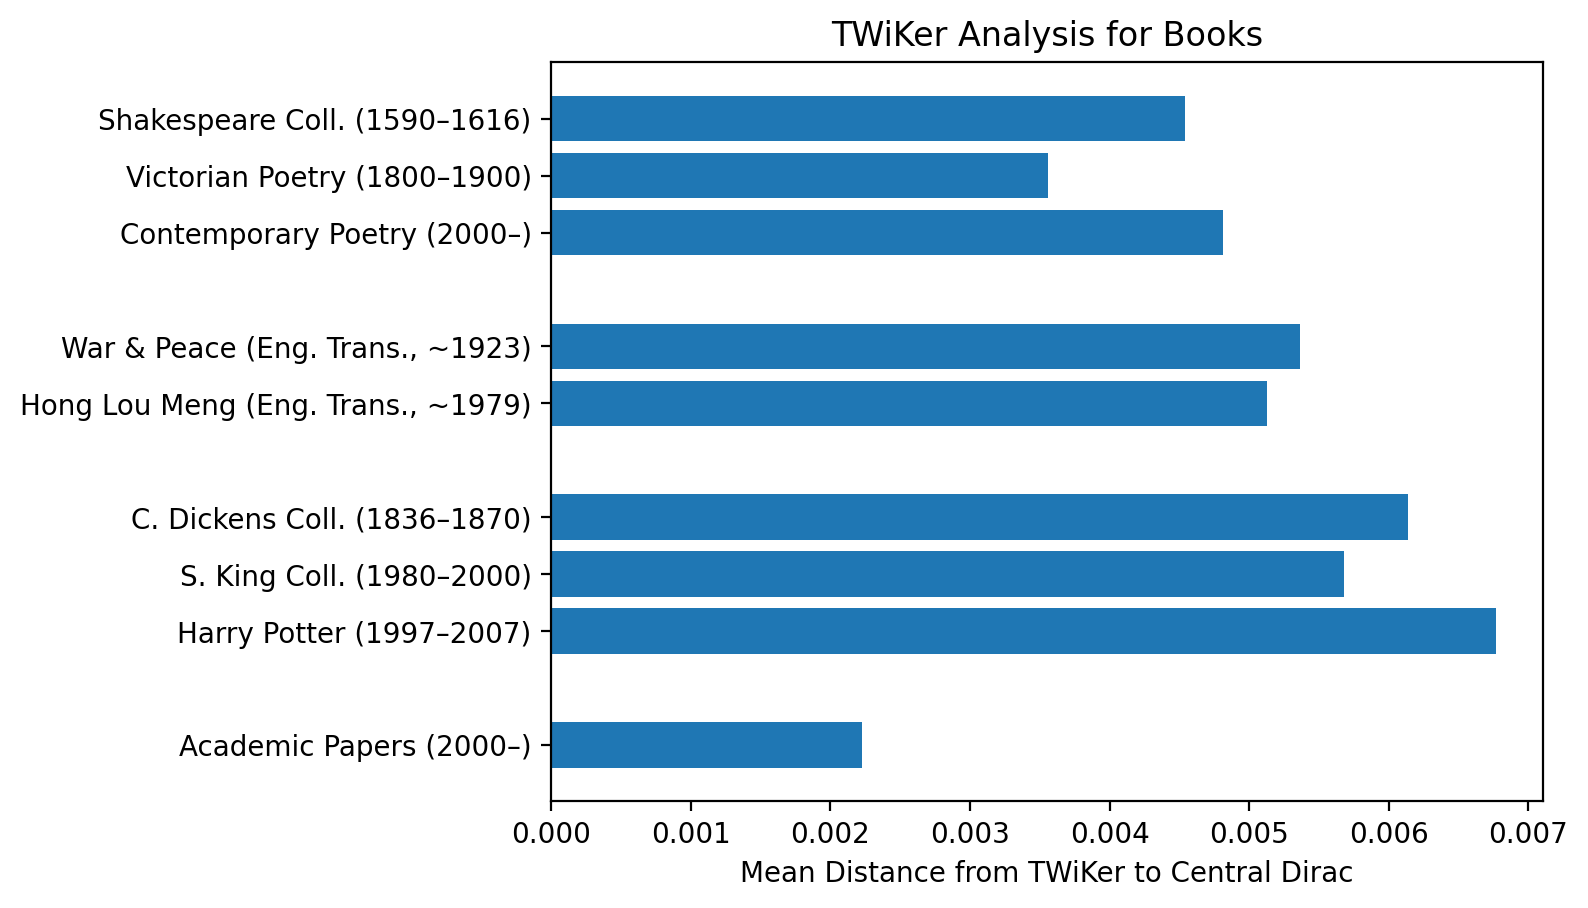

In [2]:
# Book dictionary
books = {
    "shakes": "Shakespeare Coll. (1590–1616)",  
    "victorian": "Victorian Poetry (1800–1900)",  
    "dikens": "C. Dickens Coll. (1836–1870)",  
    "warpeace": "War & Peace (Eng. Trans., ~1923)",  
    "stone_Y": "Hong Lou Meng (Eng. Trans., ~1979)",  
    "stephen": "S. King Coll. (1980–2000)",  
    "potter": "Harry Potter (1997–2007)",  
    "modern": "Contemporary Poetry (2000–)",  
    "articles": "Academic Papers (2000–)",  
}

# Load JSON data
pos_dist_dict_book = {}
for book in books:
    with open(f"results/distance/{book}.json", "r") as file:
        pos_dist_dict_book[book] = json.load(file)

# Define groups
groups = [
    ["shakes", "victorian", "modern"],  # Group 1
    ["warpeace", "stone_Y"],  # Group 2
    ["dikens", "stephen", "potter"],  # Group 3
    ["articles"],  # Group 4
]

# Flatten for ordering
ordered_keys = [key for group in groups for key in group]
ordered_labels = [books[key] for key in ordered_keys]
ordered_values = [pos_dist_dict_book[key]["all"] for key in ordered_keys]

# Add spacing between groups
spaced_labels = []
spaced_values = []
group_spacer = 1  # Space between groups

pos = 0  # Current position
positions = []

for group in groups:
    for key in group:
        spaced_labels.append(books[key])
        spaced_values.append(pos_dist_dict_book[key]["all"])
        positions.append(pos)
        pos += 1  # Normal increment
    pos += group_spacer  # Add spacing after each group

# Plot
plt.figure(dpi=200)
plt.barh(positions, spaced_values, align="center")
plt.yticks(positions, spaced_labels)
plt.xlabel("Mean Distance from TWiKer to Central Dirac")
plt.title("TWiKer Analysis for Books")
plt.gca().invert_yaxis()
plt.savefig("results/figs/books/all.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()

In [3]:
classes = {
    "intj": "Interjection (Wow, Ha)",
    "propn": "Proper Noun (Harry, USA)",
    "noun": "Noun (apple, car)",
    "verb": "Verb (run, eat)",
    "adj": "Adjective (happy, tall)",
    "adv": "Adverb (quickly, softly)",
    "sconj": "Subord. Conj. (if, as)",
    "aux": "Auxiliary Verb (is, has)",
    "prop": "Preposition (in, of)",
    "pron": "Pronoun (she, they)",
    "cconj": "Coord. Conj. (and, or)",
    "det": "Determiner (the, an)"
}

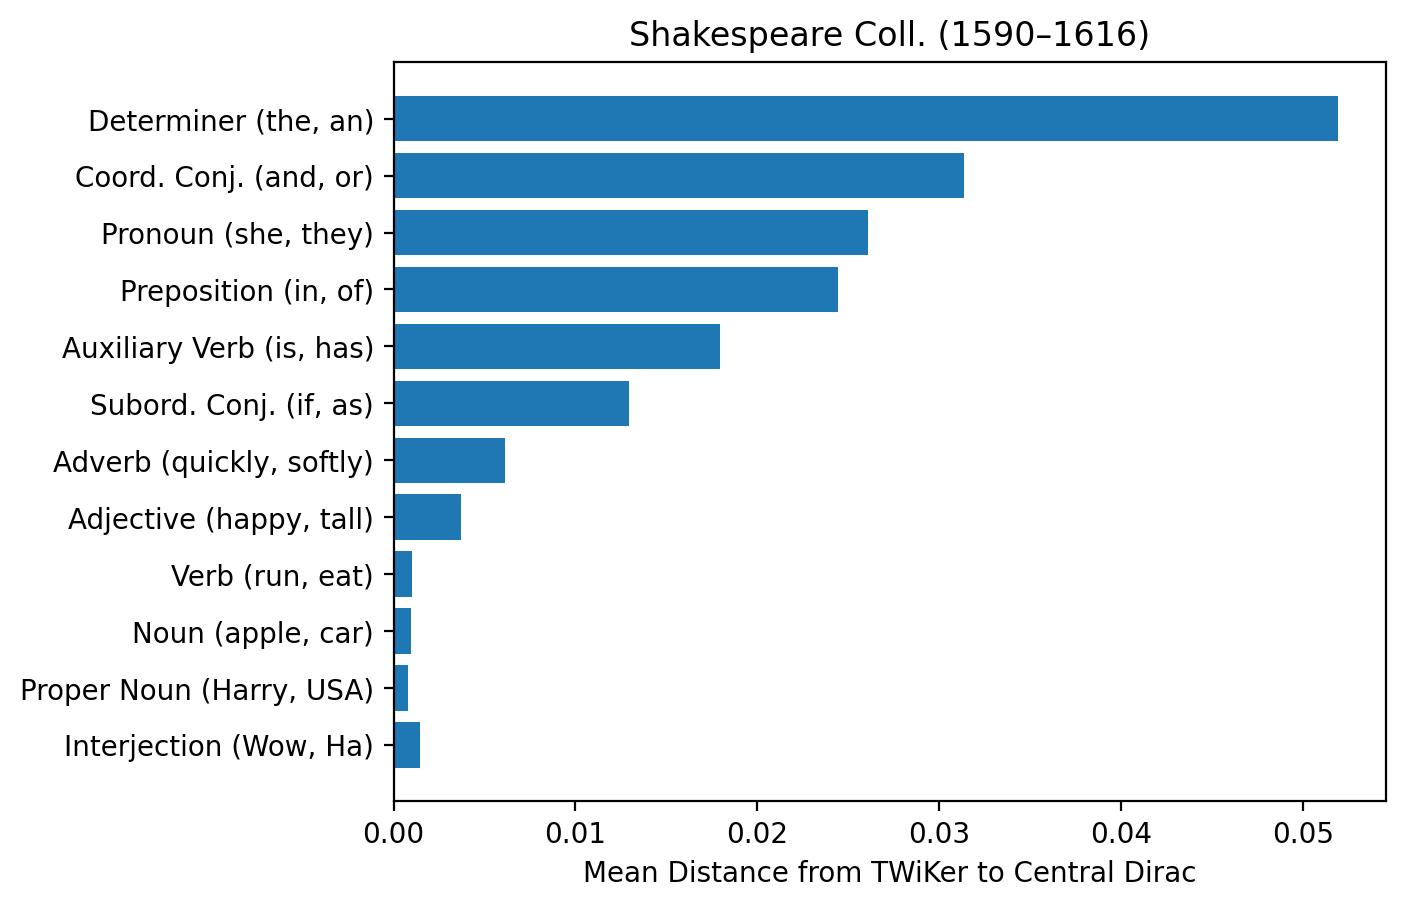

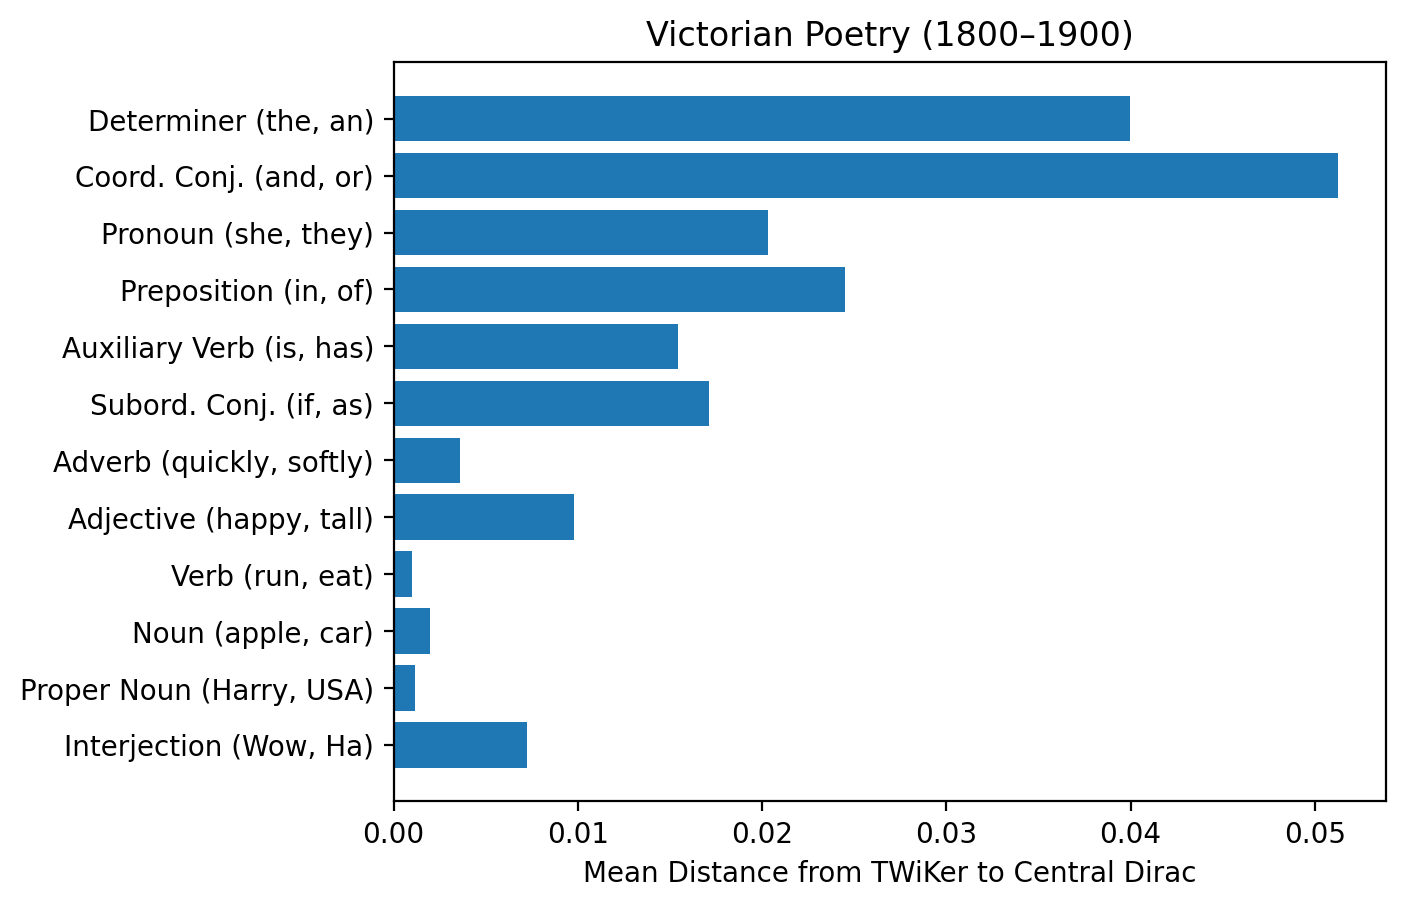

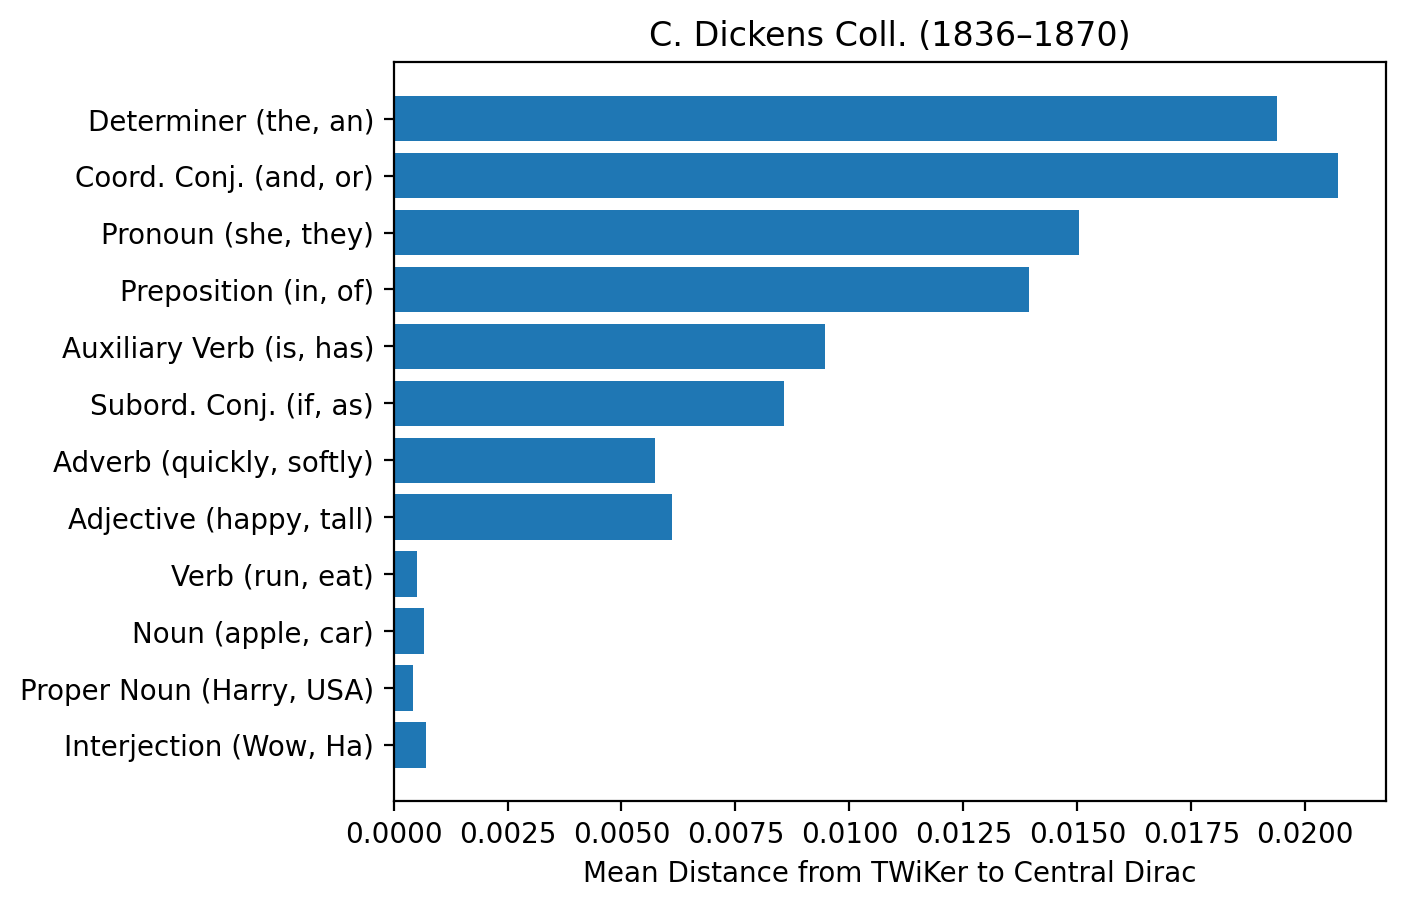

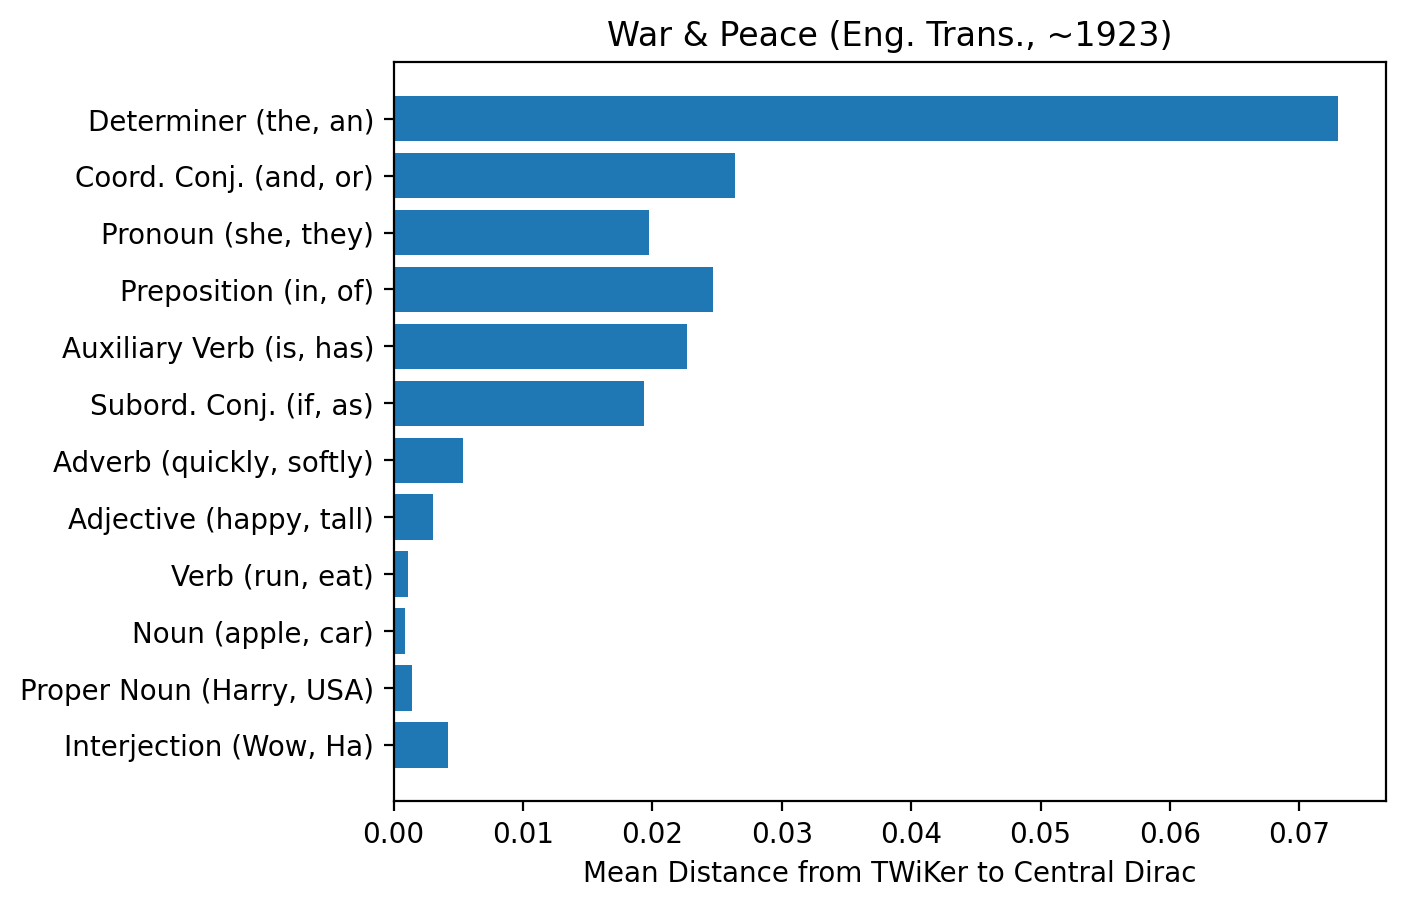

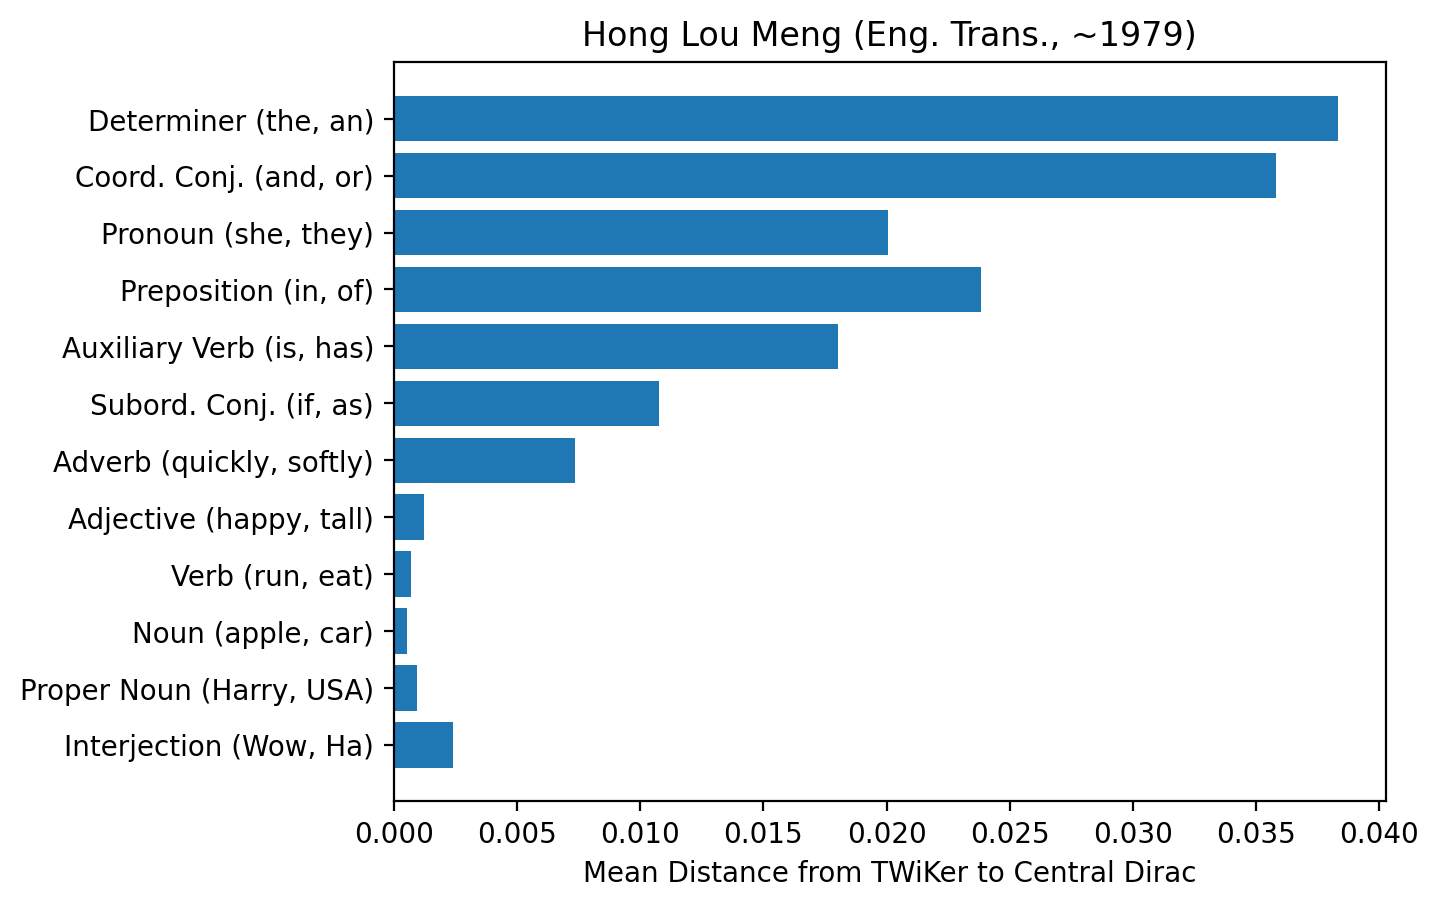

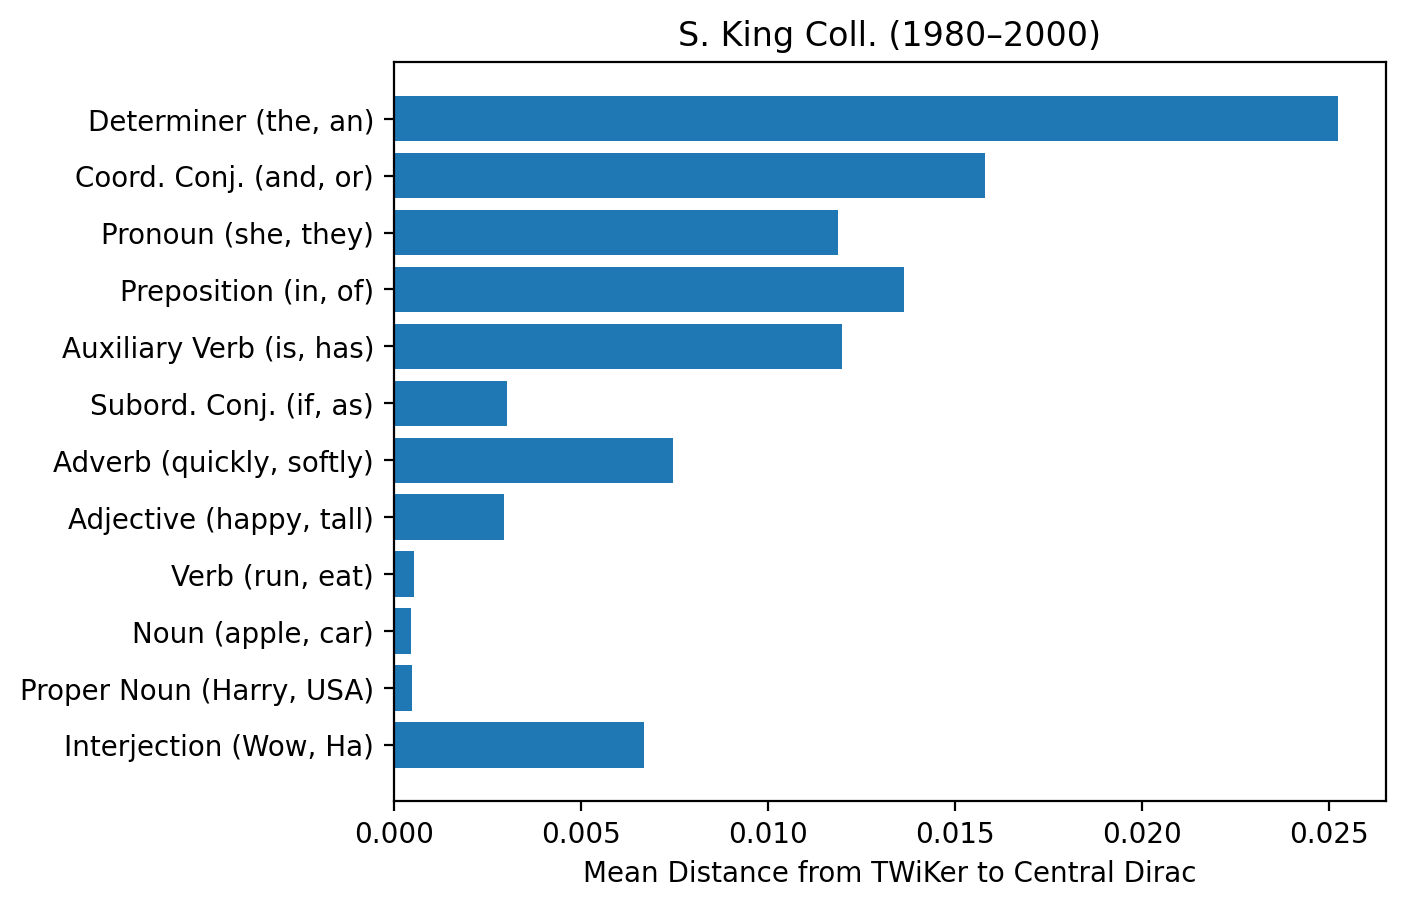

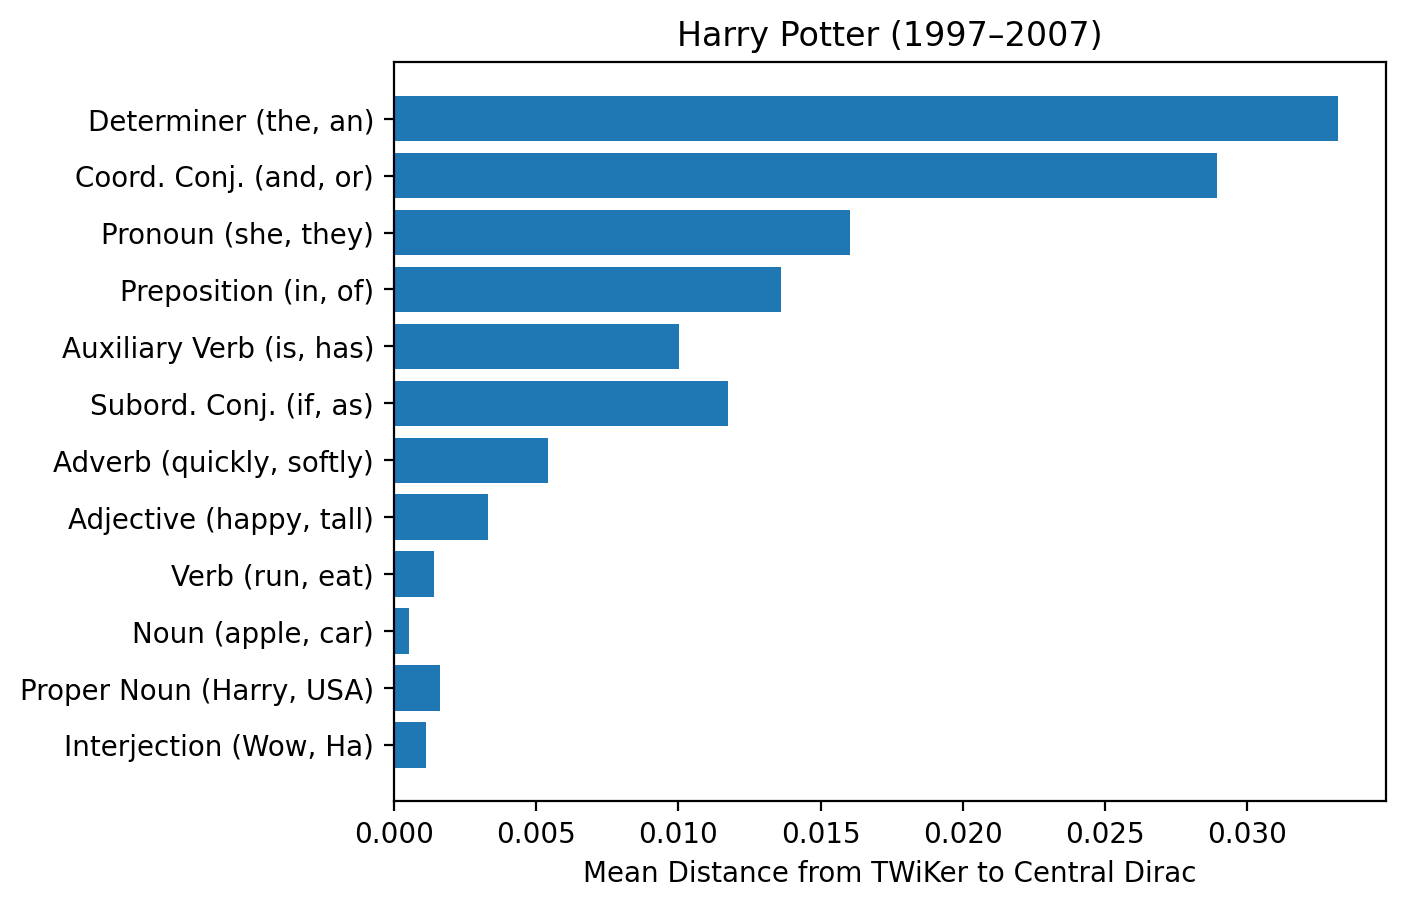

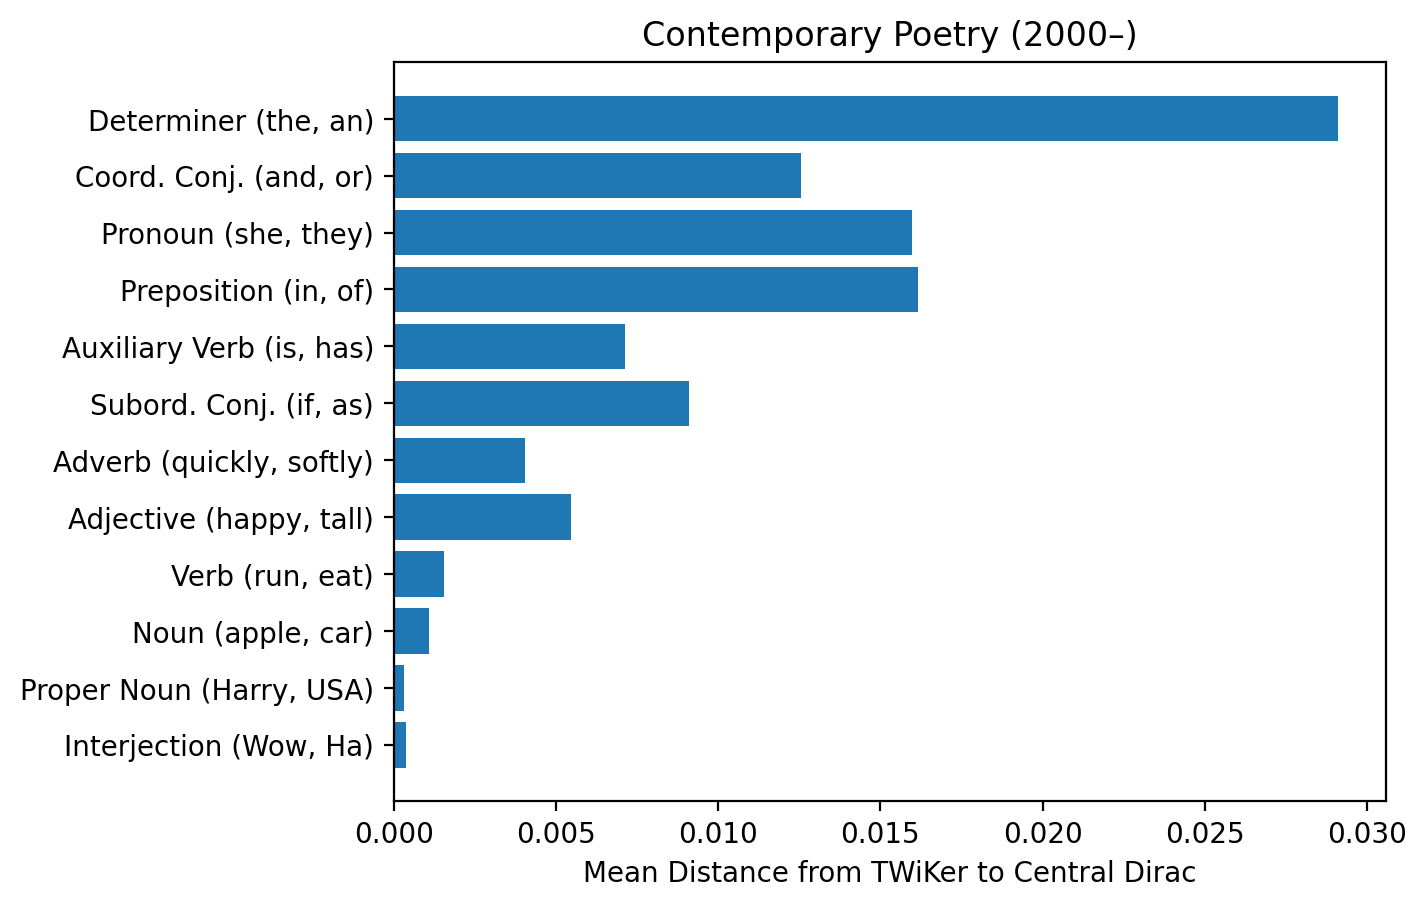

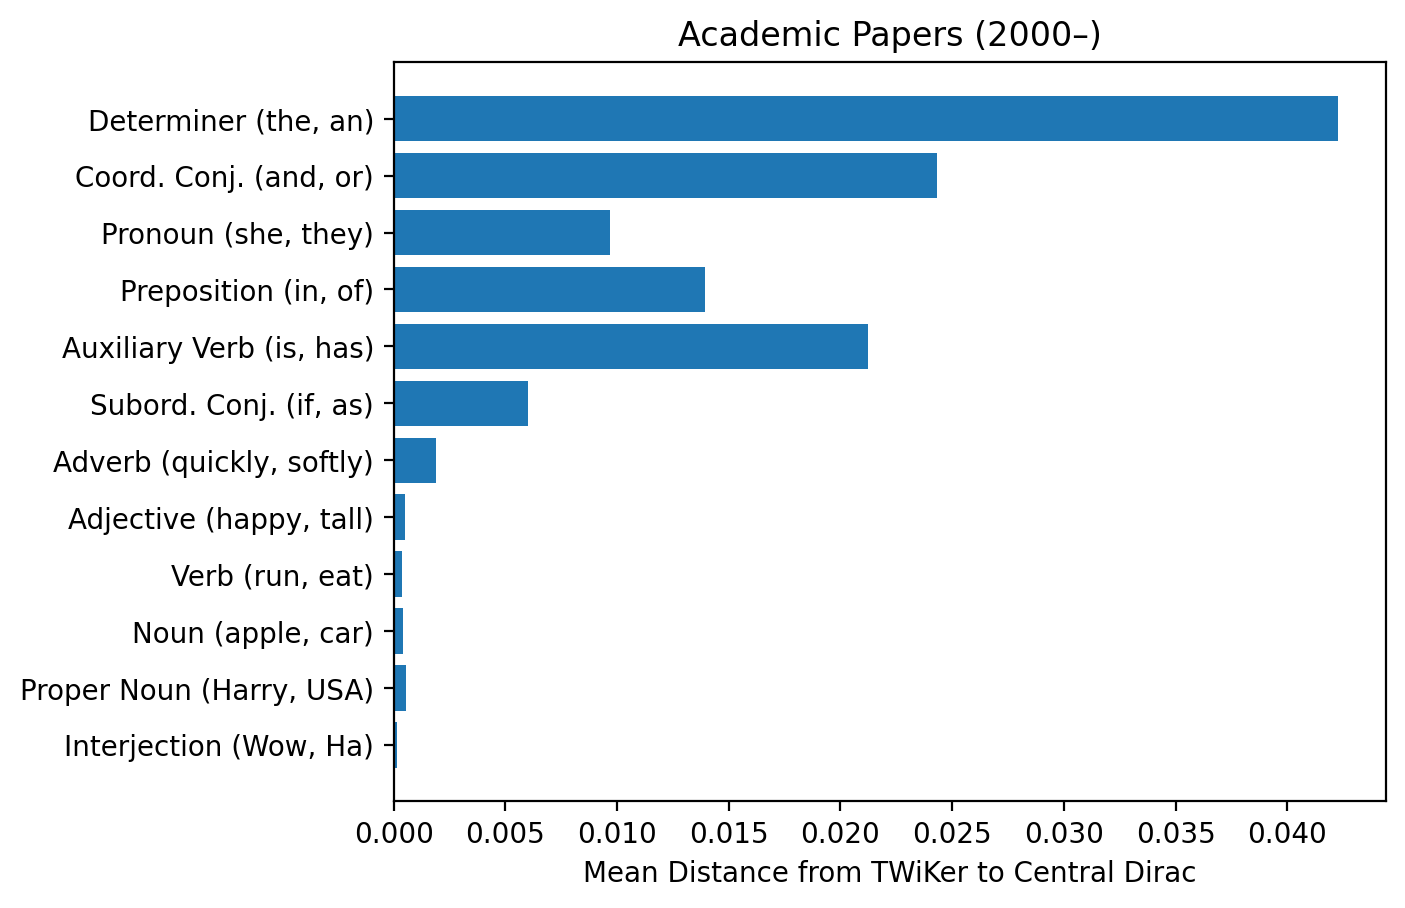

In [4]:
for book in books:
    plt.figure(dpi=200)
    plt.barh(classes.values(), [pos_dist_dict_book[book][k] for k in classes.keys()])
    plt.title(books[book])
    plt.xlabel("Mean Distance from TWiKer to Central Dirac")
    plt.savefig(f"results/figs/books/{book}.pdf", bbox_inches="tight", pad_inches=0.05)
    plt.show()